## Code - Experiments related to the regret

In [1]:
import numpy as np

from forban import *
from forban.bandits import NormalBandit, Normal
from forban.utils import *

from algorithms import *

import matplotlib.pyplot as plt

NBR_EXP = 100
HORIZON = 1500

In [2]:
def equivalentComplexity(bandit, kullback=klGaussian):
    suboptimal_arms = np.where(bandit.regrets != 0.)[0]
    class_size = len(np.where(bandit.regrets == 0.)[0])
    term_1 = bandit.regrets[suboptimal_arms]
    term_2 = kullback(bandit.rewards[suboptimal_arms], bandit.best_reward)
    c = sum(term_1 / term_2)
    return c / class_size


def EquivalentBandit(nbr_class, nbr_arm_per_class, rewards=None, min_reward=0, max_reward=1):
    if rewards == None:
        class_rewards = (max_reward - min_reward) * np.random.rand(nbr_class) + min_reward
        rewards = [class_rewards[i//nbr_arm_per_class] \
                for i in range(nbr_class*nbr_arm_per_class)]

    bandit_instance = NormalBandit(rewards, structure="Equivalent",
            complexity=equivalentComplexity)
    return bandit_instance

# XP 1

The equivalent-class complexity of the generated bandit problem is 12.500000000000005


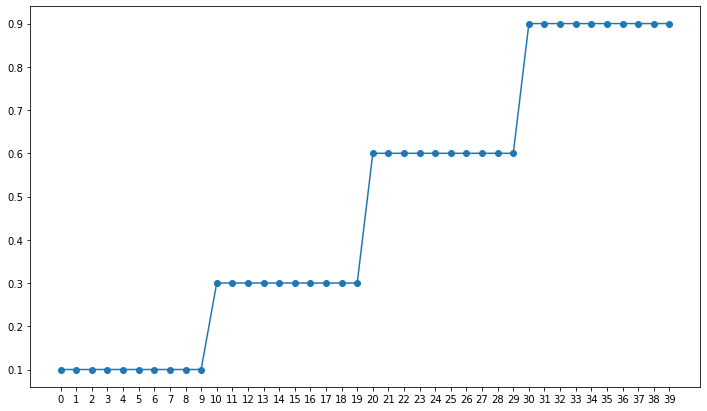

In [3]:
bandit = EquivalentBandit(4, 7, rewards = [0.1]*10+[0.3]*10+[0.6]*10+[0.9]*10)
print(f"The equivalent-class complexity of the generated bandit problem is {bandit.complexity()}")
plot_bandit(bandit)

In [4]:
imed = IMED(bandit) # IMED strategy
imed4e = RelaxedCombinatorialIMED(bandit, params={'init': -np.inf, 'kl':klGaussian, 'c':4, 'nepc':3}) # IMED-EC strategy
klucb = KLUCB(bandit) # KL-UCB strategy
experiment1 = Experiment([klucb, imed, imed4e], bandit,
                        statistics={'mean':True, 'std':True, 'quantile':True, 'pulls':False, 'all':True},
                        complexity=False)
experiment1.run(NBR_EXP, HORIZON)

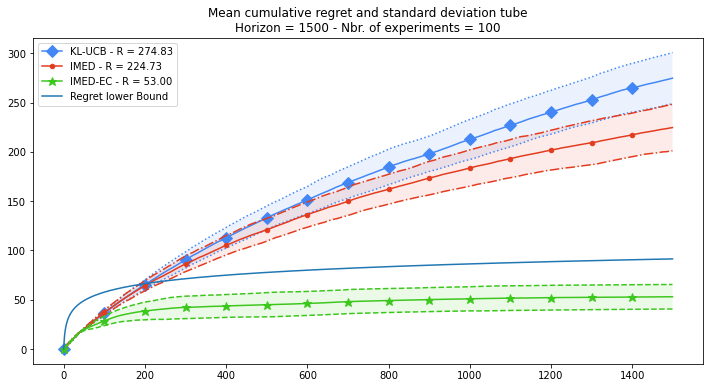

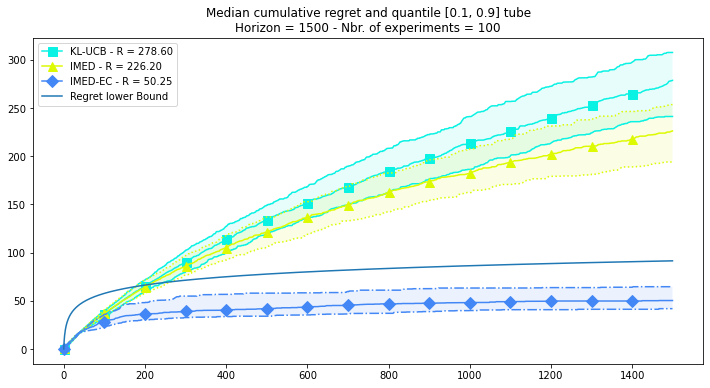

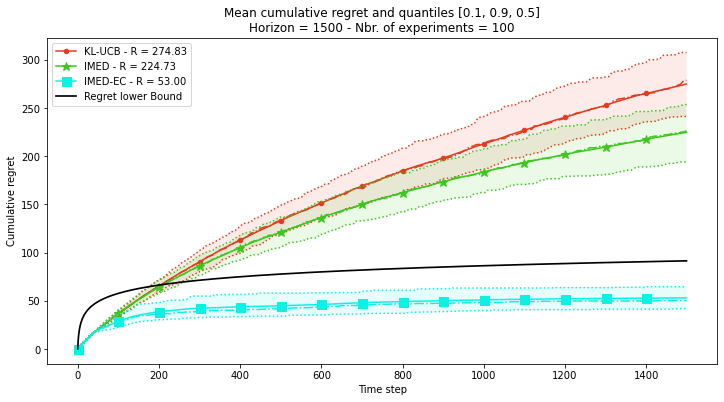

In [5]:
experiment1.plot()

# XP 2

The equivalent-class complexity of the generated bandit problem is 34.83333333333333


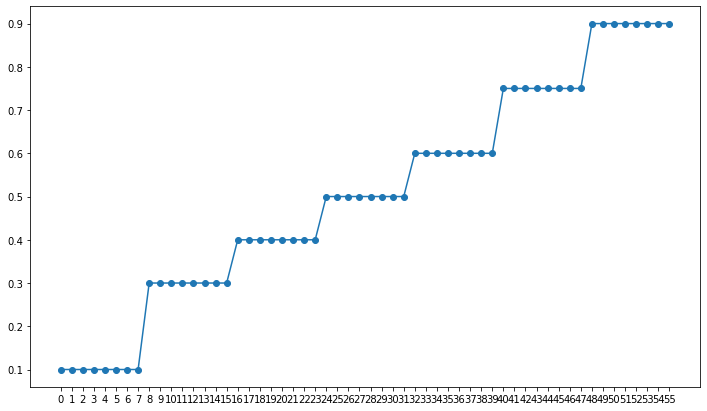

In [6]:
bandit = EquivalentBandit(4, 7, rewards = [0.1]*8+[0.3]*8+[0.4]*8+[0.5]*8+[0.6]*8+[0.75]*8+[0.9]*8)
print(f"The equivalent-class complexity of the generated bandit problem is {bandit.complexity()}")
plot_bandit(bandit)

In [7]:
imed = IMED(bandit) # IMED strategy
imed4e = RelaxedCombinatorialIMED(bandit, params={'init': -np.inf, 'kl':klGaussian, 'c':4, 'nepc':2}) # IMED-EC strategy
klucb = KLUCB(bandit) # KL-UCB strategy
experiment2 = Experiment([klucb, imed, imed4e], bandit,
                        statistics={'mean':True, 'std':True, 'quantile':True, 'pulls':False, 'all':True},
                        complexity=False)
experiment2.run(NBR_EXP, HORIZON)

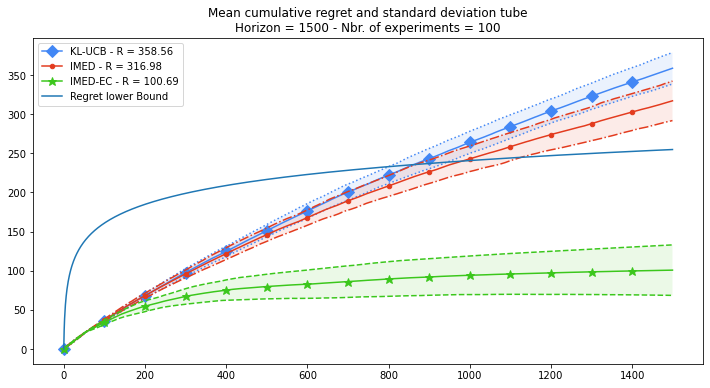

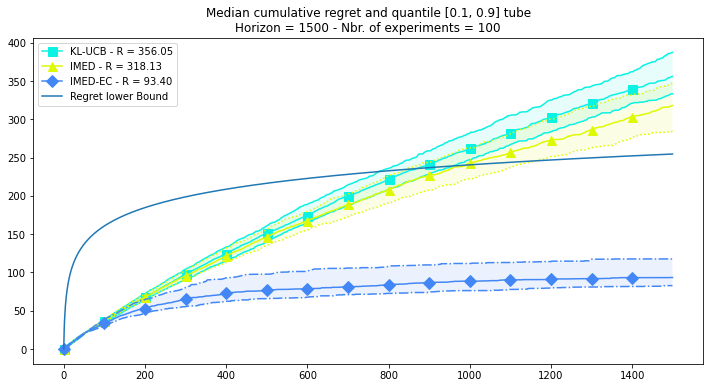

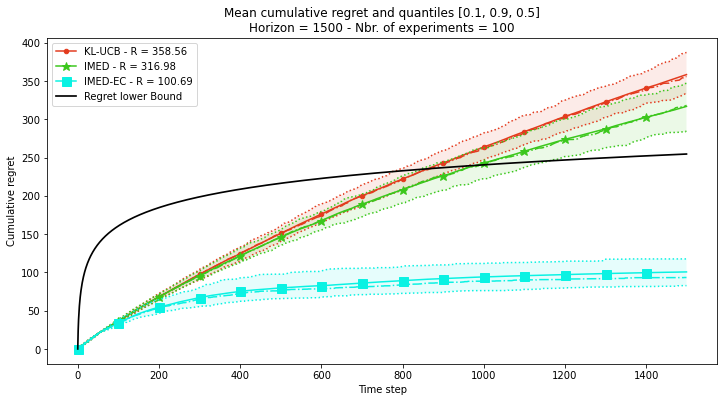

In [8]:
experiment2.plot()

# XP 3

In [ ]:
bandit = EquivalentBandit(4, 7, rewards = [0.1]*8+[0.3]*7+[0.6]*5+[0.9]*10)
print(f"The equivalent-class complexity of the generated bandit problem is {bandit.complexity()}")
plot_bandit(bandit)

In [ ]:
imed = IMED(bandit) # IMED strategy
imed4e = RelaxedCombinatorialIMED(bandit, params={'init': -np.inf, 'kl':klGaussian, 'c':4, 'nepc':2}) # IMED-EC strategy
klucb = KLUCB(bandit) # KL-UCB strategy
experiment3 = Experiment([klucb, imed, imed4e], bandit,
                        statistics={'mean':True, 'std':True, 'quantile':True, 'pulls':False, 'all':True},
                        complexity=False)
experiment3.run(NBR_EXP, HORIZON)

In [ ]:
experiment3.plot()

# XP 4

In [ ]:
bandit = EquivalentBandit(4, 7, rewards = [0.1]*10+[0.3]*23+[0.4]*11+[0.5]*6+[0.6]*4+[0.75]*14+[0.9]*8)
print(f"The equivalent-class complexity of the generated bandit problem is {bandit.complexity()}")
plot_bandit(bandit)

In [ ]:
imed = IMED(bandit) # IMED strategy
imed4e = RelaxedCombinatorialIMED(bandit, params={'init': -np.inf, 'kl':klGaussian, 'c':4, 'nepc':4}) # IMED-EC strategy
klucb = KLUCB(bandit) # KL-UCB strategy
experiment4 = Experiment([klucb, imed, imed4e], bandit,
                        statistics={'mean':True, 'std':True, 'quantile':True, 'pulls':False, 'all':True},
                        complexity=False)
experiment4.run(NBR_EXP, HORIZON)

In [ ]:
experiment4.plot()

# XP 5

In [ ]:
bandit = EquivalentBandit(4, 7, rewards = [0.1]*10+[0.3]*23+[0.4]*11+[0.5]*6+[0.6]*4+[0.75]*14+[0.9]*8)
print(f"The equivalent-class complexity of the generated bandit problem is {bandit.complexity()}")
plot_bandit(bandit)

In [ ]:
imed4e2 = RelaxedCombinatorialIMED(bandit, name="IMED-EC - q=2", params={'init': -np.inf, 'kl':klGaussian, 'c':4, 'nepc':2}) # IMED-EC strategy
imed4e4 = RelaxedCombinatorialIMED(bandit, name="IMED-EC - q=4 (opt.)", params={'init': -np.inf, 'kl':klGaussian, 'c':4, 'nepc':4}) # IMED-EC strategy
imed4e7 = RelaxedCombinatorialIMED(bandit, name="IMED-EC - q=7", params={'init': -np.inf, 'kl':klGaussian, 'c':4, 'nepc':7}) # IMED-EC strategy
imed4e12 = RelaxedCombinatorialIMED(bandit, name="IMED-EC - q=12", params={'init': -np.inf, 'kl':klGaussian, 'c':4, 'nepc':12}) # IMED-EC strategy
imed4e20 = RelaxedCombinatorialIMED(bandit, name="IMED-EC - q=20", params={'init': -np.inf, 'kl':klGaussian, 'c':4, 'nepc':20}) # IMED-EC strategy

experiment5 = Experiment([imed4e2, imed4e4, imed4e7, imed4e12, imed4e20], bandit,
                        statistics={'mean':True, 'std':True, 'quantile':True, 'pulls':False, 'all':True},
                        complexity=True)
experiment5.run(NBR_EXP, HORIZON)

In [ ]:
experiment5.plot()

# XP 6

In [ ]:
bandit = EquivalentBandit(4, 7, rewards = [0.1]*8+[0.3]*7+[0.6]*5+[0.9]*10)
print(f"The equivalent-class complexity of the generated bandit problem is {bandit.complexity()}")
plot_bandit(bandit)

In [ ]:
imed4e2 = RelaxedCombinatorialIMED(bandit, name="IMED-EC - q=2", params={'init': -np.inf, 'kl':klGaussian, 'c':4, 'nepc':2}) # IMED-EC strategy
imed4e5 = RelaxedCombinatorialIMED(bandit, name="IMED-EC - q=5 (opt.)", params={'init': -np.inf, 'kl':klGaussian, 'c':4, 'nepc':5}) # IMED-EC strategy
imed4e7 = RelaxedCombinatorialIMED(bandit, name="IMED-EC - q=7", params={'init': -np.inf, 'kl':klGaussian, 'c':4, 'nepc':7}) # IMED-EC strategy
imed4e12 = RelaxedCombinatorialIMED(bandit, name="IMED-EC - q=12", params={'init': -np.inf, 'kl':klGaussian, 'c':4, 'nepc':12}) # IMED-EC strategy
imed4e20 = RelaxedCombinatorialIMED(bandit, name="IMED-EC - q=20", params={'init': -np.inf, 'kl':klGaussian, 'c':4, 'nepc':20}) # IMED-EC strategy

experiment6 = Experiment([imed4e2, imed4e5, imed4e7, imed4e12, imed4e20], bandit,
                        statistics={'mean':True, 'std':True, 'quantile':True, 'pulls':False, 'all':True},
                        complexity=True)
experiment6.run(NBR_EXP, HORIZON)

In [ ]:
experiment6.plot()

# XP 7

In [ ]:
bandit = EquivalentBandit(4, 7, rewards = [0.1]*10+[0.3]*10+[0.6]*10+[0.9]*10)
print(f"The equivalent-class complexity of the generated bandit problem is {bandit.complexity()}")
plot_bandit(bandit)

In [ ]:
imed4e2 = RelaxedCombinatorialIMED(bandit, name="IMED-EC - q=2", params={'init': -np.inf, 'kl':klGaussian, 'c':4, 'nepc':2}) # IMED-EC strategy
imed4e5 = RelaxedCombinatorialIMED(bandit, name="IMED-EC - q=5", params={'init': -np.inf, 'kl':klGaussian, 'c':4, 'nepc':5}) # IMED-EC strategy
imed4e7 = RelaxedCombinatorialIMED(bandit, name="IMED-EC - q=7", params={'init': -np.inf, 'kl':klGaussian, 'c':4, 'nepc':7}) # IMED-EC strategy
imed4e10 = RelaxedCombinatorialIMED(bandit, name="IMED-EC - q=10 (opt.)", params={'init': -np.inf, 'kl':klGaussian, 'c':4, 'nepc':10}) # IMED-EC strategy
imed4e20 = RelaxedCombinatorialIMED(bandit, name="IMED-EC - q=20", params={'init': -np.inf, 'kl':klGaussian, 'c':4, 'nepc':20}) # IMED-EC strategy

experiment7 = Experiment([imed4e2, imed4e5, imed4e7, imed4e12, imed4e20], bandit,
                        statistics={'mean':True, 'std':True, 'quantile':True, 'pulls':False, 'all':True},
                        complexity=True)
experiment7.run(NBR_EXP, HORIZON)

In [ ]:
experiment7.plot()

# XP 8

In [ ]:
bandit = EquivalentBandit(4, 7, rewards = [0.1]*8+[0.3]*8+[0.4]*8+[0.5]*8+[0.6]*8+[0.75]*8+[0.9]*8)
print(f"The equivalent-class complexity of the generated bandit problem is {bandit.complexity()}")
plot_bandit(bandit)

In [ ]:
imed4e2 = RelaxedCombinatorialIMED(bandit, name="IMED-EC - q=2", params={'init': -np.inf, 'kl':klGaussian, 'c':4, 'nepc':2}) # IMED-EC strategy
imed4e5 = RelaxedCombinatorialIMED(bandit, name="IMED-EC - q=4", params={'init': -np.inf, 'kl':klGaussian, 'c':4, 'nepc':5}) # IMED-EC strategy
imed4e8 = RelaxedCombinatorialIMED(bandit, name="IMED-EC - q=8", params={'init': -np.inf, 'kl':klGaussian, 'c':4, 'nepc':8}) # IMED-EC strategy
imed4e10 = RelaxedCombinatorialIMED(bandit, name="IMED-EC - q=12", params={'init': -np.inf, 'kl':klGaussian, 'c':4, 'nepc':12}) # IMED-EC strategy
imed4e20 = RelaxedCombinatorialIMED(bandit, name="IMED-EC - q=20", params={'init': -np.inf, 'kl':klGaussian, 'c':4, 'nepc':20}) # IMED-EC strategy

experiment8 = Experiment([imed4e2, imed4e5, imed4e8, imed4e12, imed4e20], bandit,
                        statistics={'mean':True, 'std':True, 'quantile':True, 'pulls':False, 'all':True},
                        complexity=True)
experiment8.run(NBR_EXP, HORIZON)

In [ ]:
experiment8.plot()

# XP 9 - Test with OSSB - Slow code

In [ ]:
bandit = EquivalentBandit(3, 2, rewards=[0.3,0.3, 0.55, 0.55, 0.85,0.85])
print(f"The equivalent-class complexity of the generated bandit problem is {bandit.complexity()}")
plot_bandit(bandit)

In [ ]:
ucb = UCB(bandit) # UCB strategy
imed = IMED(bandit) # IMED strategy
imed4e = RelaxedCombinatorialIMED(bandit) # IMED-EC strategy
klucb = KLUCB(bandit) # KL-UCB strategy
ossb = OSSB(bandit, params={'init': np.inf, 'nepc':2, 'kl':klGaussian, 'gamma':0.1, 'epsilon': 0.001 }) # OSSB strategy
experiment9 = Experiment([ucb, klucb, imed, ossb, imed4e], bandit,
                        statistics={'mean':True, 'std':True, 'quantile':True, 'pulls':False, 'all':True},
                        complexity=True)
experiment9.run(NBR_EXP, HORIZON)

In [ ]:
experiment9.plot()

# XP 10 - Test with OSSB - Slow code

In [ ]:
bandit = EquivalentBandit(3, 3, rewards=[0.3,0.3,0.3, 0.5, 0.5,0.5, 0.9,0.9,0.9])
print(f"The equivalent-class complexity of the generated bandit problem is {bandit.complexity()}")
plot_bandit(bandit)

In [ ]:
NBR_EXP = 60
HORIZON = 950
ucb = UCB(bandit) # UCB strategy
imed = IMED(bandit) # IMED strategy
imed4e = RelaxedCombinatorialIMED(bandit, params={'init': -np.inf, 'kl':klGaussian, 'c':3, 'nepc':3}) # IMED-EC strategy
klucb = KLUCB(bandit) # KL-UCB strategy
ossb = OSSB(bandit, params={'init': np.inf, 'nepc':3, 'kl':klGaussian, 'gamma':0.1, 'epsilon': 0.001 }) # OSSB strategy
experiment10 = Experiment([ucb, klucb, imed, ossb, imed4e], bandit,
                        statistics={'mean':True, 'std':True, 'quantile':True, 'pulls':False, 'all':True},
                        complexity=True)
experiment10.run(NBR_EXP, HORIZON)

In [ ]:
experiment10.plot()